# MDP Method Comparison 

Notebook with explicit code to compare different methods (weighted, unweighted, cut, MLE etc.) methods to get the MDP for a 10 day PL2 exposure with flux density $10^-11$ $erg/cm^2/s$ between 2-8keV

Final results for N(E) given by Alessandro (spec.dat) and N = 84233:


   10d exposure on source with $10^{-11}$erg/cm$^{2}$/s between 2-8keV, $p=680$mbar, $\Gamma = 2$, $N_{\rm total} = 84233$, (old Aeff)

| Method      | $\mathbf{\mu_{\rm eff}}$ | $\mathbf{N_{\rm eff}}$$/\mathbf{N}$ | MDP [%] | $\mathbf{\lambda}$ |
| :----        | :----        | :----        | :----     | :----     |
|*10d exposure -- $p=687$mbar (733mbar simulated tracks), final Aeff -- on source with $10^{-11}$erg/cm$^{2}$/s between 2-8keV, $\Gamma = 2$, $N_{\rm total} = 76287$* |  
| **Moment Analysis** (no weight, no cuts) | 0.269       | 1.00   | 5.78        | n/a |
| **Moment Analysis** (standard ellipticity cut on whole spectrum) | 0.316       | 0.800   | 5.56        | n/a |
| **Moment Analysis** (Herman's method: weight by mu(E)) | 0.310       | 0.840   | 5.46        | n/a |
| **Moment Analysis** (ellitpticity weighted, optimal) | 0.313        |   0.881    | 5.29     | 0.67 | 
| **NN** (no weight, no cuts, $\lambda = 0$)    | 0.287        | 1.00      |  5.41    | 0 |
| **NN** (weighted $\lambda = 1$)    | 0.336        | 0.918      |  4.83    | 1 |
| **NN** (weighted $\lambda = 1.5$)    | 0.368        | 0.785      |  4.76    | 1.5 |
| **NN** (weighted $\lambda = 1.41$, optimal)    | 0.362        |   0.815    |  4.76    | 1.41 |
| **NN** (weighted $\lambda = 2$)    | 0.407        |   0.600    |  4.93    | 2 |

In [ ]:
Final MDP 4.112881996953663  +-  0.024757314694045608 NN weighted
Final Neff/N 0.8051874505754256  +-  0.002072326977323748
Final mu 0.36760210333637977  +-  0.0020652528440040026
Final $\lambda$ 1.8256414626359045  +-  0.008538325451052946

In [ ]:
Final MDP 4.598041131009557  +-  0.013916903163064657 Moments weighted
Final Neff/N 0.8831904097441013  +-  0.0029209413613239957
Final mu 0.3139512762186232  +-  0.0009063469526270062
Final $\lambda$ 0.6697302504413293  +-  0.006579427974650237

In [ ]:
Final MDP 5.022077321319398  +-  0.03705921402822978 Moments
Final Neff/N 1.0  +-  0.0
Final mu 0.2701454124978974  +-  0.001997745847838009
Final $\lambda$ 7.999996494569227  +-  0.0

In [ ]:
Final MDP 4.723611333004704  +-  0.03422666284543845 NN 
Final Neff/N 1.0  +-  0.0
Final mu 0.2872142445167286  +-  0.002084501113755458
Final $\lambda$ 7.999996494569227  +-  0.0

In [ ]:
Final MDP 4.865220475939595  +-  0.034911713048835405 Mom cut
Final Neff/N 0.8012040216806653  +-  0.00023586651730623788
Final mu 0.3134670988625968  +-  0.0022496388949923606
Final $\lambda$ 1.0  +-  0.0

In [ ]:
Final MDP 3.6678197257608405  +-  0.014665767243220454 NN weight
Final Neff/N 0.8044036195560945  +-  0.0018839571719211333
Final mu 0.4124011643391589  +-  0.0016604129990953815
Final $\lambda$ 1.6490744136698123  +-  0.008365030385615502

In [ ]:
Final MDP 4.14212609340205  +-  0.013916883735426093 Mom weight
Final Neff/N 0.8724676427964541  +-  0.0025877581888290977
Final mu 0.3506442838032469  +-  0.0015143945539594632
Final $\lambda$ 0.5981172811396791  +-  0.005015058027055404

In [ ]:
Final MDP 4.537749384747924  +-  0.02236087055282498 Mom
Final Neff/N 1.0  +-  0.0
Final mu 0.2989698272950305  +-  0.001477323238525876

In [ ]:
Final MDP 4.2241612184197015  +-  0.017372290344335517 NN
Final Neff/N 1.0  +-  0.0
Final mu 0.3211619926470228  +-  0.0013192363809978061
Final $\lambda$ 1.0  +-  0.0

In [ ]:
Final MDP 4.34518860383733  +-  0.013437198854058072 Mom cut
Final Neff/N 0.8098405326517725  +-  0.000359793699116551
Final mu 0.3469390566067401  +-  0.0011017085798959362
Final $\lambda$ 1.0  +-  0.0

In [5]:
#Import simple packages
import sys
import os
sys.path.insert(0, '/home/groups/rwr/alpv95/tracksml')
import numpy as np
import pickle
import numpy as np
import scipy
import pandas as pd
from scipy import interpolate
from scipy.optimize import minimize_scalar
from matplotlib import rcParams
from util.methods import *
#Plotting Style Params
rcParams['savefig.dpi']           = 300
rcParams['path.simplify']         = True
rcParams['figure.figsize']        = 4,4
rcParams['font.family']           = "serif"
rcParams['mathtext.fontset']      = "custom"
rcParams['errorbar.capsize']      = 3
rcParams['axes.linewidth']        = 0.5 
rcParams['font.weight']           = "bold"
rcParams['xtick.major.size']      = 6
rcParams['ytick.major.size']      = 6 
rcParams['xtick.minor.size']      = 3   
rcParams['ytick.minor.size']      = 3
rcParams['xtick.minor.visible']   = True
rcParams['ytick.minor.visible']   = True
rcParams['xtick.direction']      = "in"
rcParams['ytick.direction']      = "in" 
rcParams['xtick.top']      = True
rcParams['ytick.right']      = True 
rcParams['xtick.major.width']     = 1
rcParams['ytick.major.width']     = 1
rcParams['xtick.minor.width']     = 1
rcParams['ytick.minor.width']     = 1
rcParams['lines.markeredgewidth'] = 1
rcParams['legend.numpoints']      = 1
rcParams['legend.frameon']        = False
rcParams['legend.handletextpad']      = 0.3
import matplotlib.pyplot as plt


%matplotlib inline
home_dir = '/home/groups/rwr/alpv95/tracksml/'

Simple helper functions, including weighted Stokes':

In [27]:
def weighted_stokes(angles, weights, lambd):
    '''If weights equal (or lambd == 0) this reduces to normal Stokes, and Neff == N'''
    if weights is None:
        weights = np.ones(len(angles))
    Q = np.sum(2*weights**lambd*np.cos(2*angles))
    U = np.sum(2*weights**lambd*np.sin(2*angles))
    I = np.sum(weights**lambd)
    
    mu = np.sqrt(Q**2 + U**2) / I
    phi0 = 0.5*np.arctan2(U,Q)
    Neff = I**2 / np.sum(weights**(2*lambd))
    
    return mu, phi0, Neff

def MDP(N, mu):
    "MDP in %"
    return 100*4.29 / (mu * np.sqrt(N))

def pi2_pi2(x):
    '''Bring angle (radians) to range [-pi/2, pi/2] '''
    return np.mod(x + np.pi/2,np.pi) - np.pi/2

def ellipticity_cut(angles, moms, keep_fraction):
        '''
        Applies ellipticity based cuts to predicted photoelectron angles.
        '''
        mom_cuts = np.arange(1,4,0.01)
        for mom_cut in mom_cuts:
            if len(angles[moms > mom_cut]) < keep_fraction * len(angles):
                break
        return mom_cut
    
def circular_mean_weight(angles, weights, axis):
    mean = np.array([np.mean(weights*np.cos(2*angles),axis=axis), np.mean(weights*np.sin(2*angles),axis=axis)])
    mu = mean / np.linalg.norm(mean,axis=0)
    return 0.5*np.arctan2(mu[1],mu[0])

area_old = np.loadtxt("Rev_IXPE_Mirror_Aeff_old.txt")
area = np.loadtxt("MMA_cal-eff-area_20200831.txt")[:,(0,-1)]
eff1 = np.loadtxt("du_efficiency_687mbar.txt")
spec = np.loadtxt("spec.dat")

In [14]:
df_peri = pd.read_csv('data/IXPE_tstspec/GX301_peri.txt',delim_whitespace=True)
df_quad = pd.read_csv('data/IXPE_tstspec/GX301_quad.txt',delim_whitespace=True)
df_isp = pd.read_csv('data/IXPE_tstspec/ISP.txt',delim_whitespace=True)

[Text(0.5,0,'E [keV]'), Text(0,0.5,'EVPA')]

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


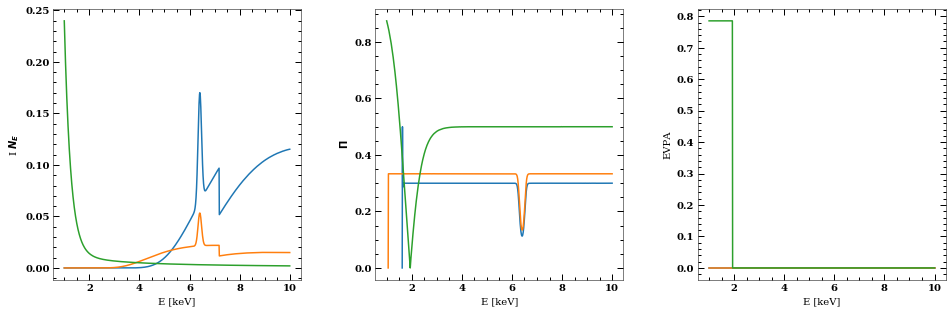

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(16,5),ncols=3,gridspec_kw={'wspace':0.3})
ax1.plot(df_peri['ee'],df_peri['z'])
ax1.plot(df_quad['ee'],df_quad['z'])
ax1.plot(df_isp['ee'],df_isp['z'])
ax1.update({'xlabel':'E [keV]', 'ylabel':r'I $N_E$'})

ax2.plot(df_peri['ee'],np.sqrt(df_peri['zu']**2 + df_peri['zq']**2) / df_peri['z'])
ax2.plot(df_quad['ee'],np.sqrt(df_quad['zu']**2 + df_quad['zq']**2) / df_quad['z'])
ax2.plot(df_isp['ee'],np.sqrt(df_isp['zu']**2 + df_isp['zq']**2) / df_isp['z'])
ax2.update({'xlabel':'E [keV]', 'ylabel':r'$\Pi$'})

ax3.plot(df_peri['ee'],0.5*np.arctan2(df_peri['zu'],df_peri['zq']))
ax3.plot(df_quad['ee'],0.5*np.arctan2(df_quad['zu'],df_quad['zq']))
ax3.plot(df_isp['ee'],0.5*np.arctan2(df_isp['zu'],df_isp['zq']))
ax3.update({'xlabel':'E [keV]', 'ylabel':r'EVPA'})

[Text(0.5,0,'E [keV]'), Text(0,0.5,'Q $N_E$')]

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


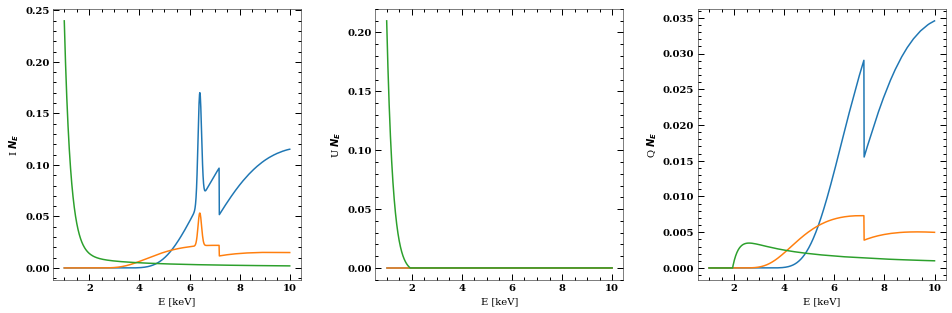

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(16,5),ncols=3,gridspec_kw={'wspace':0.3})
ax1.plot(df_peri['ee'],df_peri['z'])
ax1.plot(df_quad['ee'],df_quad['z'])
ax1.plot(df_isp['ee'],df_isp['z'])
ax1.update({'xlabel':'E [keV]', 'ylabel':r'I $N_E$'})

ax2.plot(df_peri['ee'],df_peri['zu'])
ax2.plot(df_quad['ee'],df_quad['zu'])
ax2.plot(df_isp['ee'],df_isp['zu'])
ax2.update({'xlabel':'E [keV]', 'ylabel':r'U $N_E$'})

ax3.plot(df_peri['ee'],df_peri['zq'])
ax3.plot(df_quad['ee'],df_quad['zq'])
ax3.plot(df_isp['ee'],df_isp['zq'])
ax3.update({'xlabel':'E [keV]', 'ylabel':r'Q $N_E$'})

[Text(0.5,0,'E [keV]'), Text(0,0.5,'Q $N_E$'), (1.0, 9.3)]

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


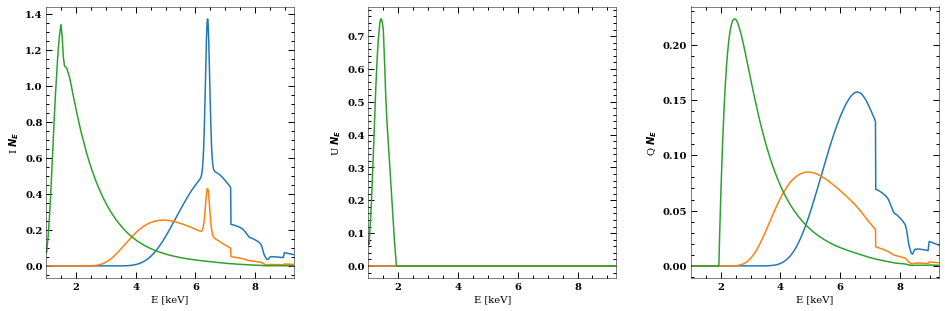

In [29]:
aeff = np.interp(df_peri['ee'],area[:,0],area[:,1]) * np.interp(df_peri['ee'],eff1[:,0],eff1[:,1])

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(16,5),ncols=3,gridspec_kw={'wspace':0.3})
ax1.plot(df_peri['ee'],df_peri['z']*aeff)
ax1.plot(df_quad['ee'],df_quad['z']*aeff)
ax1.plot(df_isp['ee'],df_isp['z']*aeff)
ax1.update({'xlabel':'E [keV]', 'ylabel':r'I $N_E$', 'xlim':(1.0,9.3)})

ax2.plot(df_peri['ee'],df_peri['zu']*aeff)
ax2.plot(df_quad['ee'],df_quad['zu']*aeff)
ax2.plot(df_isp['ee'],df_isp['zu']*aeff)
ax2.update({'xlabel':'E [keV]', 'ylabel':r'U $N_E$', 'xlim':(1.0,9.3)})

ax3.plot(df_peri['ee'],df_peri['zq']*aeff)
ax3.plot(df_quad['ee'],df_quad['zq']*aeff)
ax3.plot(df_isp['ee'],df_isp['zq']*aeff)
ax3.update({'xlabel':'E [keV]', 'ylabel':r'Q $N_E$', 'xlim':(1.0,9.3)})

In [4]:
with fits.open(home_dir + 'TEST_meas_10p0_pol_train___TEST_dict_meas2__ensemble.fits', memmap=False) as hdut:
    print(hdut.info())
    data = hdut[1].data
    print(hdut[1].header)

Filename: /home/groups/rwr/alpv95/tracksml/TEST_meas_10p0_pol_train___TEST_dict_meas2__ensemble.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     29   14400R x 8C   [6E, E, E, 6E, 2E, 2E, 2E, E]   
None
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   84 / length of dimension 1                          NAXIS2  =                14400 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    8 / number of table fields                         TTYPE1  = 'NN_PHI  '                                

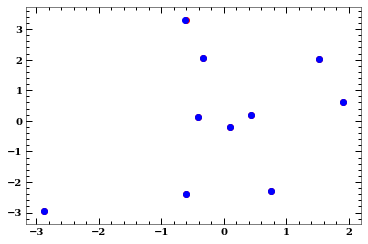

In [9]:
plt.scatter(data["XY_NN_ABS"][:10,0],data["XY_NN_ABS"][:10,1],color='r')
plt.scatter(data["XY_MOM_ABS"][:10,0],data["XY_MOM_ABS"][:10,1],color='b')

(array([1.6000e+01, 5.3000e+01, 1.2000e+02, 1.6300e+02, 3.5200e+02,
        1.0920e+03, 3.9980e+03, 9.6820e+03, 1.5152e+04, 1.6055e+04,
        1.2853e+04, 8.6730e+03, 5.6710e+03, 3.7170e+03, 2.6310e+03,
        1.9450e+03, 1.4120e+03, 1.0730e+03, 8.1300e+02, 6.9000e+02,
        5.3400e+02, 4.9500e+02, 4.1200e+02, 3.2800e+02, 2.9900e+02,
        2.6300e+02, 1.9200e+02, 1.7600e+02, 1.3000e+02, 1.3700e+02,
        1.6100e+02, 1.4200e+02, 1.0600e+02, 5.7000e+01, 3.4000e+01,
        5.5000e+01, 4.3000e+01, 2.7000e+01, 3.8000e+01, 3.2000e+01,
        3.3000e+01, 2.8000e+01, 3.1000e+01, 2.6000e+01, 2.1000e+01,
        1.4000e+01, 7.0000e+00, 1.1000e+01, 5.0000e+00, 2.0000e+00]),
 array([1.1693891, 1.3337383, 1.4980875, 1.6624367, 1.8267859, 1.9911351,
        2.1554842, 2.3198335, 2.4841826, 2.648532 , 2.812881 , 2.97723  ,
        3.1415794, 3.3059285, 3.4702778, 3.6346269, 3.7989762, 3.9633253,
        4.1276746, 4.2920237, 4.4563727, 4.620722 , 4.7850714, 4.9494205,
        5.1137695, 5.2

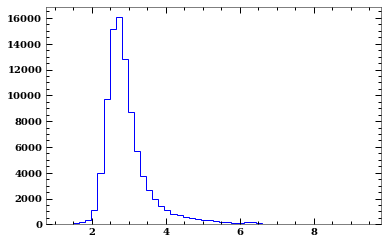

In [15]:
plt.hist(data['NN_ENERGY'],histtype='step',bins=50,color='b')
# plt.hist(pi2_pi2(data['MOM_PHI']),histtype='step',bins=50,color='r')

(array([5779.,    0.,    0.,    0.,  501.,    0.,    0.,    0.,  561.,
           0.,    0.,    0.,  717.,    0.,    0.,    0.,  655.,    0.,
           0.,    0.,  468.,    0.,    0.,    0., 5719.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

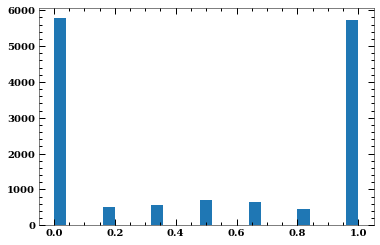

In [23]:
plt.hist(np.mean((data['NN_PHI'] >= np.pi/2) + (data['NN_PHI'] < -np.pi/2), axis=(1,2)), bins=25)

(array([115., 126., 131., 143., 166., 174., 184., 186., 216., 226., 266.,
        237., 288., 270., 263., 291., 298., 361., 297., 280., 261., 248.,
        255., 258., 213., 204., 171., 201., 156., 138., 125., 111., 118.,
        108., 110., 107., 146., 147., 126., 144., 175., 168., 170., 180.,
        190., 202., 222., 231., 284., 274., 257., 288., 317., 269., 312.,
        257., 242., 243., 256., 257., 217., 185., 218., 183., 205., 146.,
        158., 141., 140., 148.]),
 array([-3.14126219e+00, -3.05151028e+00, -2.96175838e+00, -2.87200647e+00,
        -2.78225456e+00, -2.69250265e+00, -2.60275074e+00, -2.51299883e+00,
        -2.42324692e+00, -2.33349501e+00, -2.24374310e+00, -2.15399119e+00,
        -2.06423928e+00, -1.97448737e+00, -1.88473546e+00, -1.79498355e+00,
        -1.70523164e+00, -1.61547973e+00, -1.52572782e+00, -1.43597591e+00,
        -1.34622400e+00, -1.25647209e+00, -1.16672019e+00, -1.07696828e+00,
        -9.87216366e-01, -8.97464457e-01, -8.07712547e-01, -7.1796

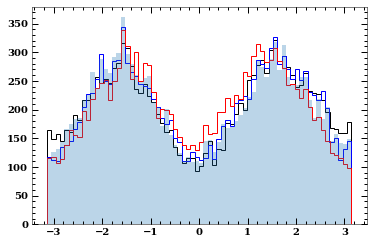

In [29]:
plt.hist(data['NN_PHI'][:,0,0], bins=70, histtype='step', color='k')
plt.hist(data['NN_PHI'][:,0,1], bins=70, histtype='step', color='b')
plt.hist(data['NN_PHI'][:,0,2], bins=70, histtype='step', color='r')

pi_fix = (np.mean((data['NN_PHI'] >= np.pi/2) + (data['NN_PHI'] < -np.pi/2), axis=(1,2)) >= 0.5) * np.pi
plt.hist(pi_pi(circular_mean(data['NN_PHI'], axis=(1,2)) + pi_fix), alpha=0.3,bins=70)

(array([144., 152., 163., 217., 222., 230., 284., 311., 347., 335., 344.,
        367., 473., 436., 405., 360., 398., 343., 271., 316., 268., 232.,
        196., 196., 186., 189., 234., 217., 242., 272., 271., 306., 311.,
        376., 397., 403., 445., 441., 370., 341., 331., 306., 336., 259.,
        248., 211., 209., 159., 155., 175.]),
 array([-3.14126219e+00, -3.01560952e+00, -2.88995685e+00, -2.76430417e+00,
        -2.63865150e+00, -2.51299883e+00, -2.38734615e+00, -2.26169348e+00,
        -2.13604081e+00, -2.01038813e+00, -1.88473546e+00, -1.75908279e+00,
        -1.63343011e+00, -1.50777744e+00, -1.38212477e+00, -1.25647209e+00,
        -1.13081942e+00, -1.00516675e+00, -8.79514075e-01, -7.53861401e-01,
        -6.28208728e-01, -5.02556055e-01, -3.76903381e-01, -2.51250708e-01,
        -1.25598035e-01,  5.46385781e-05,  1.25707312e-01,  2.51359985e-01,
         3.77012659e-01,  5.02665332e-01,  6.28318005e-01,  7.53970679e-01,
         8.79623352e-01,  1.00527603e+00,  1.13092

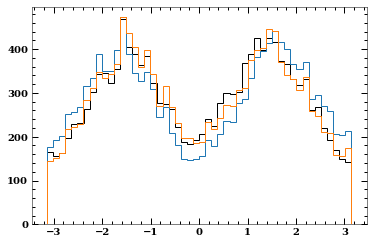

In [83]:
# plt.hist(data['NN_PHI'][:,0,0],bins=50,histtype='step',color='k')
# plt.hist(data['NN_PHI'][:,0,1],bins=50,histtype='step',color='k')
plt.hist(data['NN_PHI'][:,0,2],bins=50,histtype='step',color='k')
pi_fix = (data['NN_PHI'][:,0,0] >= np.pi/2) * np.pi + (data['NN_PHI'][:,0,0] < -np.pi/2) * np.pi
pi_fix1 = (data['NN_PHI'][:,0,2] >= np.pi/2) * np.pi + (data['NN_PHI'][:,0,2] < -np.pi/2) * np.pi
plt.hist(pi_pi(circular_mean(data['NN_PHI'],axis=(1,2)) + pi_fix),bins=50,histtype='step')
plt.hist(pi_pi(circular_mean(data['NN_PHI'],axis=(1,2)) + pi_fix1),bins=50,histtype='step')

In [51]:
x = np.array([[-1.41430402, -1.45397198],
 [-1.38644815, -1.378577  ],
 [-1.45166743, -1.42719949],])

In [56]:
x[:,0]

array([-1.41430402, -1.38644815, -1.45166743])

(array([4.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 9.000e+00, 5.000e+00,
        8.000e+00, 5.000e+00, 6.000e+00, 8.000e+00, 1.000e+01, 1.400e+01,
        1.200e+01, 1.700e+01, 1.100e+01, 1.500e+01, 2.200e+01, 3.200e+01,
        5.700e+01, 8.700e+01, 8.800e+01, 8.800e+01, 8.600e+01, 1.030e+02,
        1.320e+02, 1.610e+02, 1.200e+02, 1.220e+02, 1.010e+02, 1.420e+02,
        1.730e+02, 1.990e+02, 2.340e+02, 2.960e+02, 3.100e+02, 3.740e+02,
        3.980e+02, 4.470e+02, 7.750e+02, 1.512e+03, 2.533e+03, 2.874e+03,
        2.236e+03, 1.290e+03, 6.000e+02, 2.210e+02, 5.300e+01, 1.700e+01,
        3.000e+00, 2.000e+00]),
 array([ 1.3044508,  1.4959545,  1.6874583,  1.8789619,  2.0704658,
         2.2619696,  2.453473 ,  2.6449769,  2.8364806,  3.0279844,
         3.2194881,  3.410992 ,  3.6024957,  3.7939994,  3.9855032,
         4.1770067,  4.3685107,  4.5600142,  4.7515182,  4.943022 ,
         5.1345253,  5.3260293,  5.517533 ,  5.709037 ,  5.9005404,
         6.0920444,  6.283548 ,  6.4

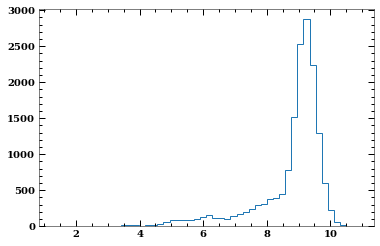

In [43]:
plt.hist(data['NN_ENERGY'],histtype='step', bins=50)

In [31]:
data['PIX_X'].shape

(30000, 400)

### Dataset: 10 day PL2

First we describe the dataset on which the MDP will be calculated. UV filter transmission is included in our Aeff.

In [44]:
#Load DU information
area_old = np.loadtxt("Rev_IXPE_Mirror_Aeff_old.txt")
area = np.loadtxt("MMA_cal-eff-area_20200831.txt")[:,(0,-1)]
eff1 = np.loadtxt("du_efficiency_687mbar.txt")
spec = np.loadtxt("spec.dat")
E = area_old[:,0]

Calculate observed $\frac{dN}{dE}$ and total N for a PL2 source, observed flux density $= 10^{-11}$erg/cm^2/s between 2-8keV, 10 day exposure.

For a PL2 source: $\frac{dN}{dE} = AE^{-2}$

$10^{-11}erg = \int^{8keV}_{2keV} AE^{-2}*E dE$, use this to calculate $A$

Then final observed N(E) is: $\frac{dN}{dE} = (10*24*60*60) * A_{eff}(E) * QE(E) * E^{-2} * A$ with appropriate units.

N total is given by integrating N(E), in our case just multiplying by E bin widths (0.04keV) and summing.
$N_{tot} = \sum_{2-8kev} \frac{dN}{dE} * 0.04$

In [45]:
A = (1e-11 * 6.24151e+8) / (np.log(8) - np.log(2))
print("N total: ", np.sum((10*24*60*60) * np.interp(np.linspace(2,8,1201),area_old[:,0],area_old[:,1]) * 0.95 * np.interp(np.linspace(2,8,1201),eff1[:,0],eff1[:,1])/0.8 * A * np.linspace(2,8,1201)**(-2) * 0.005 ))
print("N total: ", np.sum((10*24*60*60) * np.interp(np.linspace(2,8,1201),area[:,0],area[:,1]) 
                          * np.interp(np.linspace(2,8,1201),eff1[:,0],eff1[:,1])/0.8 * A * np.linspace(2,8,1201)**(-2) 
                          * 0.005 ))


N total:  85173.04310656742
N total:  76477.46800167757


In [46]:
N_E_28 = (10*24*60*60) * np.interp(np.linspace(2,8,1201),area[:,0],area[:,1]) \
                          * np.interp(np.linspace(2,8,1201),eff1[:,0],eff1[:,1])/0.8 * A * np.linspace(2,8,1201)**(-2) \
                          * 0.005 
N_E_28[0] *= 0.5
N_E_28[-1] *= 0.5


In [47]:
#for PL1:
A = (1e-11 * 6.24151e+8) / (np.log(8) - np.log(2))

(1601,)


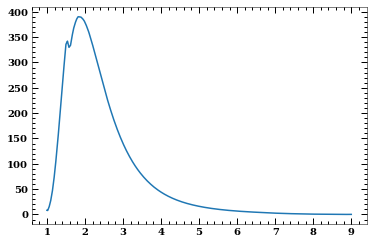

In [48]:
N_E = (10*24*60*60) * np.interp(np.linspace(1,9,1601),area[:,0],area[:,1]) \
                          * np.interp(np.linspace(1,9,1601),eff1[:,0],eff1[:,1])/0.8 * A * np.linspace(1,9,1601)**(-2) \
                          * 0.005 
print(N_E.shape)

plt.plot(np.linspace(1,9,1601), N_E)

In [12]:
N_E = (10*24*60*60) * np.linspace(1,9,1601)**(-1) \
                          * 0.005 

In [10]:
dN_dE = (10*24*60*60) * np.interp(np.linspace(2,8,1201),area_old[:,0],area_old[:,1]) * 0.95 * np.interp(np.linspace(2,8,1201),eff1[:,0],eff1[:,1])/0.8 * A * np.linspace(2,8,1201)**(-2)
plt.plot(spec[:,0],spec[:,1]/0.055,"b",label="dN_dE Alessandro")
plt.plot(np.linspace(2,8,1201),dN_dE,"r",label="dN_dE Lawrence")
plt.legend()


ValueError: operands could not be broadcast together with shapes (1201,) (13,) 

Small discrepancy

In [2]:
mus_lamb1 = np.loadtxt("ml_modf_lambda1.dat")

In [342]:
#Interpolating modulation factors from fig.4 lambda=1 curve to find count weighted (effective) mu
cw_mu = 0
f = interpolate.interp1d(mus_lamb1[:,0], mus_lamb1[:,1], bounds_error=False, fill_value=(mus_lamb1[0,1],mus_lamb1[-1,1]), kind="cubic")
mus_alessandro = f(spec[:,0])
for i, _ in enumerate(spec[:,0]):
    cw_mu += spec[i,1] * mus_alessandro[i]
print("effective mu >> ", cw_mu / np.sum(spec[:,1]))


effective mu >>  0.2934298660191233


In [4]:
#Optimal lambda curve
modf = np.array([0.01152239, 0.02857549, 0.03676831, 0.06658046, 0.09859106,
       0.15013547, 0.19493121, 0.2406856 , 0.29436692, 0.3316057 ,
       0.35084625, 0.3885731 , 0.42661466, 0.45710947, 0.47333499,
       0.50264052, 0.52664183, 0.5512557 , 0.57346432, 0.58645119,
       0.60806635, 0.63022263, 0.648868  , 0.6567768 , 0.66483871,
       0.67238125, 0.67989105, 0.69809003, 0.69501987, 0.71270086,
       0.71867784, 0.72651447, 0.72621233, 0.73313247, 0.74710843,
       0.74305002, 0.73992393, 0.74700496, 0.74446969, 0.75163083])
E_x = np.arange(1.05,9.0,0.2)

In [15]:
modf = np.array([0.013413253206931144,0.03582107035701835,0.04705704681193877,0.07445266826446555,0.11371186431655898,
                 0.1730904718414583,0.22025438088202015,0.2601416616577313,0.32159814522417185,0.3566545983353937,
                 0.37967555069511855,0.4096253389348866,0.4519022678793293,0.47461959819251587,0.48600014297735894,
                 0.5169858028700594,0.5362709624310664,0.5598153052485632,0.5799242928123779,0.5921995970346027,
                 0.6121168521517308,0.6321629146956309,0.6475517807150526,0.6563560799476915,0.6574089331922874,
                 0.6671626016694785,0.6778543859593182,0.6897796705679359,0.6843595479460708,0.7028520478761379,
                 0.7019611214434911,0.7139015215495638,0.7150924884492114,0.722299312049427,0.7425621154333044,
                 0.7313050602016353,0.7314076023043921,0.7398437224374446,0.7356118132954848,0.7413855839407567])
neffs = np.array([0.94269862, 0.80185904, 0.8087041 , 0.92823076, 0.88734158,
       0.86816774, 0.87638907, 0.9062186 , 0.88310844, 0.88178803,
       0.86443199, 0.86913395, 0.8532781 , 0.87187596, 0.86564145,
       0.86447448, 0.87058656, 0.87424586, 0.87447681, 0.87377783,
       0.87814416, 0.88397511, 0.88407838, 0.88649601, 0.89434212,
       0.89446071, 0.89215596, 0.89180937, 0.89297111, 0.90102346,
       0.90098569, 0.89760676, 0.89679204, 0.89590266, 0.89643237,
       0.90120803, 0.89508762, 0.88802987, 0.88681704, 0.88714796])
E_x = np.arange(1.05,9.0,0.2)

In [171]:
modf = np.array([0.01152239, 0.02857549, 0.03676831, 0.06658046, 0.09859106,
       0.15013547, 0.19493121, 0.2406856 , 0.29436692, 0.3316057 ,
       0.35084625, 0.3885731 , 0.42661466, 0.45710947, 0.47333499,
       0.50264052, 0.52664183, 0.5512557 , 0.57346432, 0.58645119,
       0.60806635, 0.63022263, 0.648868  , 0.6567768 , 0.66483871,
       0.67238125, 0.67989105, 0.69809003, 0.69501987, 0.71270086,
       0.71867784, 0.72651447, 0.72621233, 0.73313247, 0.74710843,
       0.74305002, 0.73992393, 0.74700496, 0.74446969, 0.75163083])
E_x = np.arange(1.05,9.0,0.2)

f = interpolate.interp1d(E_x, modf, bounds_error=False, fill_value=(modf[0],modf[-1]), kind="cubic")
modf_weight = f(energies_spec)

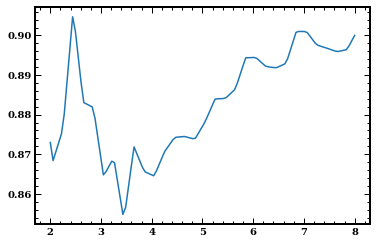

In [23]:
plt.plot(spec[:,0],Neff)

In [22]:
#Using full curve to calculate count weighted (effective) mu
cw_mu = 0
cw_neff = 0
f = interpolate.interp1d(E_x, modf, bounds_error=False, fill_value=(modf[0],modf[-1]), kind="linear")
g = interpolate.interp1d(E_x, neffs, bounds_error=False, fill_value=(neffs[0],neffs[-1]), kind="linear")
mus = f(spec[:,0])
Neff = g(spec[:,0])
for i,e in enumerate(spec[:,0]):
    cw_mu += spec[i,1] * mus[i]
    cw_neff += spec[i,1] * Neff[i]
print("effective mu >> ", cw_mu / np.sum(spec[:,1]))
print("effective Neff >> ", cw_neff / np.sum(spec[:,1]))
print(MDP(cw_mu / np.sum(spec[:,1]), 82433* cw_neff / np.sum(spec[:,1])))


effective mu >>  0.3295964800287547
effective Neff >>  0.8780058338328267
4.838107052306757


Text(0,0.5,'$\\mu$')

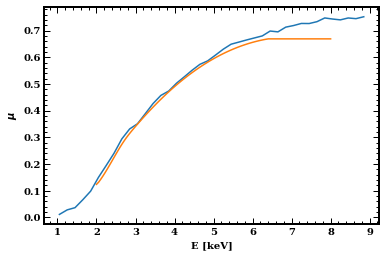

In [344]:
plt.plot(E_x,modf)
plt.plot(spec[:,0],mus_alessandro)
plt.xlabel("E [keV]", fontweight="bold")
plt.ylabel(r"$\mu$")

# MDP Calculation on N=84233, N(E) = spec.dat spectrum

Sample of tracks that follow spec distribution

2.02


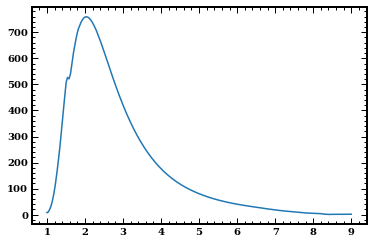

In [27]:
plt.plot(np.linspace(1,9,1601),f(np.linspace(1,9,1601)))
print(np.linspace(1,9,1601)[np.argmax(f(np.linspace(1,9,1601)))])

In [10]:
3.82 * 20

76.39999999999999

In [41]:
20*1.81

36.2

In [28]:
len(angles_mom[energies_sim == E[10:71][np.argmax(f(E[10:71]))]]) / np.max(f(E[10:71]))

36.50753594162937

In [13]:
f = interpolate.interp1d(np.linspace(1,9,1601), N_E, kind="cubic")
modf_weight = f(energies_spec)

In [34]:
with open(home_dir +  "fom_pol_big_train___flat_all_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)
angles, angles_mom, angles_sim, moms, errors, _, _, _, \
_, energies_sim, _, _, _ = A

E = set(energies_sim[:])
E = np.sort(list(E))


angles_NN_spec = []
angles_mom_spec = []
angles_sim_spec = []
moms_spec = []
errors_spec = []
energies_spec = []

fom5 = []
fom5_err = []
mu0s = []
mus = []

for i,e in enumerate(E[10:71]):
    cut = (e == energies_sim)
#     N = np.sum(cut)
    N = int(f(e) * 20 * 1.3)
    if i == 0 or e > 8.89:
        N = int(N*0.5)
    idxs = np.random.choice(np.arange(np.sum(cut)), size=N, replace=False)

    angles_NN_spec.append(angles[cut][idxs])
    angles_mom_spec.append(angles_mom[cut][idxs])
    angles_sim_spec.append(angles_sim[cut][idxs])
    errors_spec.append(errors[cut][idxs])
    moms_spec.append(moms[cut][idxs])
    energies_spec.append(energies_sim[cut][idxs])

angles_NN_spec = np.concatenate(angles_NN_spec,axis=0)
angles_mom_spec = np.concatenate(angles_mom_spec)
angles_sim_spec = np.concatenate(angles_sim_spec)
errors_spec = np.concatenate(errors_spec)
moms_spec = np.concatenate(moms_spec)
energies_spec = np.concatenate(energies_spec)
print(angles_NN_spec.shape)

errors_epis_spec = circular_std(angles_NN_spec,axis=(1,2))
angles_NN_spec = circular_mean(angles_NN_spec,axis=(1,2))
errors_spec = np.sqrt(errors_spec.T**2/4 + errors_epis_spec**2).T
errors_spec = np.sqrt(np.mean(errors_spec**2,axis=(1,2)))

#     def mdp(lambd):
#         mu, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec), 1/np.ndarray.flatten(errors_spec), lambd)
#         return MDP(Neff,mu)

#     res = minimize_scalar(mdp, bounds=(0,8),method="bounded")


with open(home_dir +  "review_unpol_train___flat_all_unpol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)
angles, angles_mom, angles_sim, moms, errors, _, _, _, \
_, energies_sim, _, _, _ = A


angles_NN_spec0 = []
angles_mom_spec0 = []
angles_sim_spec0 = []
moms_spec0 = []
errors_spec0 = []
energies_spec0 = []

for i,e in enumerate(E[10:71]):
    #e = E[np.argmin(abs(spec[i,0] - E))]
    cut = (e == energies_sim)
#     N = np.sum(cut)
    N = int(f(e) * 20 * 1.3)
    if i == 0 or e > 8.89:
        N = int(N*0.5)
    idxs = np.random.choice(np.arange(np.sum(cut)), size=N, replace=False)

    angles_NN_spec0.append(angles[cut][idxs])
    angles_mom_spec0.append(angles_mom[cut][idxs])
    angles_sim_spec0.append(angles_sim[cut][idxs])
    errors_spec0.append(errors[cut][idxs])
    moms_spec0.append(moms[cut][idxs])
    energies_spec0.append(energies_sim[cut][idxs])

angles_NN_spec0 = np.concatenate(angles_NN_spec0,axis=0)
angles_mom_spec0 = np.concatenate(angles_mom_spec0)
angles_sim_spec0 = np.concatenate(angles_sim_spec0)
errors_spec0 = np.concatenate(errors_spec0)
moms_spec0 = np.concatenate(moms_spec0)
energies_spec0 = np.concatenate(energies_spec0)
print(angles_NN_spec0.shape)

errors_epis_spec0 = circular_std(angles_NN_spec0,axis=(1,2))
angles_NN_spec0 = circular_mean(angles_NN_spec0,axis=(1,2))
errors_spec0 = np.sqrt(errors_spec0.T**2/4 + errors_epis_spec0**2).T
errors_spec0 = np.sqrt(np.mean(errors_spec0**2,axis=(1,2)))








for lamb in np.linspace(0,3,31):
    print(lamb)
#     def mdp(lambd):
#         mu, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec), 1/np.ndarray.flatten(errors_spec), lambd)
#         return MDP(Neff,mu)

#     res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
    mu, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec), 1/np.ndarray.flatten(errors_spec), lamb)
    # mu_mom, _, Neff_mom = weighted_stokes(angles_mom_spec, None, 1)
    # cut = ellipticity_cut(angles_mom_spec, moms_spec, 0.81)
    # angles_mom_spec_cut = angles_mom_spec[moms_spec > cut]
    # mu_cut, _, Neff_cut = weighted_stokes(angles_mom_spec_cut, None, 1)

    mu0, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec0), 1/np.ndarray.flatten(errors_spec0), lamb)
    #     mu0s.append(mu0)
    #     mus.append(mu)
    # mu0_mom, _, Neff0_mom = weighted_stokes(angles_mom_spec0, None, 1)
    # cut = ellipticity_cut(angles_mom_spec0, moms_spec0, 0.81)
    # angles_mom_spec_cut = angles_mom_spec0[moms_spec0 > cut]
    # mu0_cut, _, Neff0_cut = weighted_stokes(angles_mom_spec_cut, None, 1)

    # print("NN ", mu0/mu, "+-", np.sqrt((2 - mu0**2)/(Neff - 1)) / mu)
    # print("Mom ", mu0_mom/mu_mom, "+-", np.sqrt((2 - mu0_mom**2)/(Neff0_mom - 1)) / mu_mom)
    # print("Cut", mu0_cut/mu_cut, "+-", np.sqrt((2 - mu0_cut**2)/(Neff0_cut - 1)) / mu_cut)
    # print("lambda ", res["x"])
    fom5.append(mu0/mu)
    fom5_err.append(np.sqrt((2 - mu0**2)/(Neff - 1)) / mu)


(422278, 3, 15)
(422278, 3, 15)
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0


In [ ]:
2.7
NN  0.016023034398879255 +- 0.007054152122739383
Mom  0.020550522112992686 +- 0.007837797704057277
Cut 0.01888186240550287 +- 0.007687874089935065
lambda  1.9331479470096469

4.5
NN  0.001108745909185208 +- 0.004208269945090459
Mom  0.002892031538604564 +- 0.005182085367357016
Cut 0.005958181492026404 +- 0.005057417090146785
lambda  1.1026509420343489

6.4
NN  0.00423499062137739 +- 0.0034382756186412
Mom  0.00570227387533451 +- 0.004377977165999669
Cut 0.004213837250565764 +- 0.0042298299210430336
lambda  0.9076028689805875

8.0
NN  0.00472375236291715 +- 0.003177526678505583
Mom  0.00872307283354885 +- 0.003890013784979775
Cut 0.008761665878888325 +- 0.0038017438778313434
lambda  0.8423747780955716

PL1
NN  0.006935855458532797 +- 0.0048796914468254736
Mom  0.01406464819752402 +- 0.006196078847335713
Cut 0.013415494626760774 +- 0.005930295659756976
lambda  1.081125654533663

NN  0.005568801371219717 +- 0.00417664676726821
Mom  0.008298336242803316 +- 0.005321524576947815
Cut 0.007700814400400638 +- 0.005095137138119674
lambda  1.0863002826860941

PL2

NN  0.004620227817496737 +- 0.005388409167795318
Mom  0.009252783684419069 +- 0.006838310270211279
Cut 0.0070403917133624585 +- 0.006543223734672506
lambda  1.1923506442810619

NN  0.006917371339014189 +- 0.0049517018079419115
Mom  0.012643009896573373 +- 0.006268014519838491
Cut 0.010877481882966838 +- 0.005982776919130266
lambda  1.1778244933000062

In [67]:
mu_mom

0.28310345850264046

In [70]:
np.sqrt((2 - mu0_mom**2)/(Neff0_mom - 1))

0.0023965122404136603

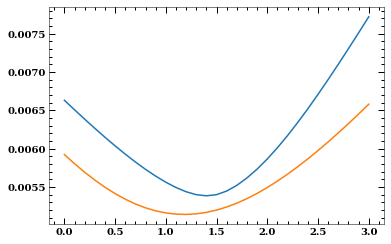

In [35]:
plt.plot(np.linspace(0,3,31), np.mean(np.stack([fom, fom1,fom2, fom3,fom4,fom5]),axis=0))
plt.plot(np.linspace(0,3,31), np.mean(np.stack([fom_err, fom1_err,fom2_err,fom3_err,fom4_err,fom5_err]),axis=0))

In [36]:
fom = np.mean(np.stack([fom, fom1,fom2, fom3,fom4]),axis=0)
fom_err = np.mean(np.stack([fom_err, fom1_err,fom2_err,fom3_err,fom4_err]),axis=0)

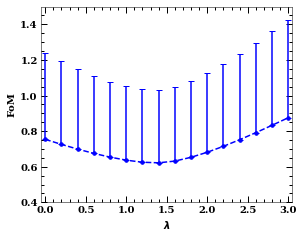

In [43]:
plt.figure(figsize=(4.5,3.6))
plt.errorbar(np.linspace(0,3,31)[::2], [f*100 for f in fom[::2]],
         yerr=[np.zeros(len(fom[::2])),[(f + err)/2 * 0.72 * 100 for f,err in zip(fom[::2],fom_err[::2])]], color="b",linestyle='--',marker="o",markersize=3.5 )
plt.ylabel(r"FoM",fontweight="bold")
plt.xlabel(r"$\lambda$")
plt.ylim(0.4,1.5)
plt.xlim(-0.05,3.05)
plt.savefig("plots/" + "lambda" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

In [18]:
[0,[f + err for f,err in zip(fom,fom_err)]]

[0,
 [0.011615912905961229,
  0.011326869099143327,
  0.01109402131483696,
  0.01093111999702516,
  0.010848458291838413,
  0.010849705121076778,
  0.010931462494975471,
  0.011085790940507113,
  0.011303536196577821,
  0.01157655878064892,
  0.011898569796651402,
  0.012265115274032401,
  0.012673234165542212,
  0.013121068184420732,
  0.013607524958567334,
  0.014132014215829485,
  0.014694248679461848,
  0.015294095725663787,
  0.015931467539241607,
  0.01660624062250104,
  0.017318198192641333,
  0.01806699086852964,
  0.018852112206578356,
  0.019672886316127704,
  0.020528465170750007,
  0.021417833484969073,
  0.02233981924155448,
  0.023293108180223374,
  0.0242762608066781,
  0.02528773074284806,
  0.026325883497615284]]

In [56]:
with open(home_dir +  "review_unpol_train___flat_all_unpol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)
angles, angles_mom, angles_sim, moms, errors, _, _, _, \
_, energies_sim, _, _, _ = A


angles_NN_spec = []
angles_mom_spec = []
angles_sim_spec = []
moms_spec = []
errors_spec = []
energies_spec = []

for i,e in enumerate(E[10:71]):
    #e = E[np.argmin(abs(spec[i,0] - E))]
    cut = (e == energies_sim)
    N = int(f(e) * 20 * 3.8)
    #N = np.sum(cut)
    if i == 0 or e > 8.89:
        N = int(N*0.5)
    idxs = np.random.choice(np.arange(np.sum(cut)), size=N, replace=False)

    angles_NN_spec.append(angles[cut][idxs])
    angles_mom_spec.append(angles_mom[cut][idxs])
    angles_sim_spec.append(angles_sim[cut][idxs])
    errors_spec.append(errors[cut][idxs])
    moms_spec.append(moms[cut][idxs])
    energies_spec.append(energies_sim[cut][idxs])

angles_NN_spec = np.concatenate(angles_NN_spec,axis=0)
angles_mom_spec = np.concatenate(angles_mom_spec)
angles_sim_spec = np.concatenate(angles_sim_spec)
errors_spec = np.concatenate(errors_spec)
moms_spec = np.concatenate(moms_spec)
energies_spec = np.concatenate(energies_spec)
print(angles_NN_spec.shape)

errors_epis_spec = circular_std(angles_NN_spec,axis=(1,2))
angles_NN_spec = circular_mean(angles_NN_spec,axis=(1,2))
errors_spec = np.sqrt(errors_spec.T**2/4 + errors_epis_spec**2).T
errors_spec = np.sqrt(np.mean(errors_spec**2,axis=(1,2)))

#     def mdp(lambd):
#         mu, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec), 1/np.ndarray.flatten(errors_spec), lambd)
#         return MDP(Neff,mu)

#     res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
mu0, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec), 1/np.ndarray.flatten(errors_spec), 0)
mu0_mom, _, Neff0_mom = weighted_stokes(angles_mom_spec, None, 1)
    

#print("mu0 >> ", mu0)
print("FoM >> ", mu0/mu)
#print("mu0 error >> ", np.sqrt((2 - mu0**2)/(Neff - 1)))
print("FoM error >> ", np.sqrt((2 - mu0**2)/(Neff - 1)) / mu)

#print("mu0 >> ", mu0_mom)
print("\n FoM_mom >> ", mu0_mom/mu_mom)
#print("mu0 error >> ", np.sqrt((2 - mu0_mom**2)/(Neff0_mom - 1)))
print("FoM error mom >> ", np.sqrt((2 - mu0_mom**2)/(Neff0_mom - 1)) / mu_mom)

(848126, 3, 15)
FoM >>  0.007668767226983824
FoM error >>  0.004748492832105083

 FoM_mom >>  0.008088360893691143
FoM error mom >>  0.005126104998362034


In [33]:
0.8/30.5

0.02622950819672131

In [20]:
mdps = []
neffs = []
mus = []
lambdas = []
#"fom_pol_big_train___pl1_pol__ensemble.pickle"
#"fom_pol_big_train___flat_all_pol__ensemble.pickle"
#"fom_pol_big_train___flat_weight_pol__ensemble.pickle"
with open(home_dir +  "fom_pol_big_train___flat_weight_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)
angles, angles_mom, angles_sim, moms, errors, _, _, _, \
_, energies_sim, _, _, _ = A

E = set(energies_sim[:])
E = np.sort(list(E))

for i in range(5):
    angles_NN_spec = []
    angles_mom_spec = []
    angles_sim_spec = []
    moms_spec = []
    errors_spec = []
    energies_spec = []

    f = interpolate.interp1d(np.linspace(1,9,1601), N_E, kind="cubic")
    modf_weight = f(energies_spec)

    for i,e in enumerate(E[10:71]):
        #e = E[np.argmin(abs(spec[i,0] - E))]
        cut = (e == energies_sim)
        N = int(f(e) * 20 * 0.4)
        if i == 0 or e > 8.89:
            N = int(N*0.5)
        idxs = np.random.choice(np.arange(np.sum(cut)), size=N, replace=False)

        angles_NN_spec.append(angles[cut][idxs])
        angles_mom_spec.append(angles_mom[cut][idxs])
        angles_sim_spec.append(angles_sim[cut][idxs])
        errors_spec.append(errors[cut][idxs])
        moms_spec.append(moms[cut][idxs])
        energies_spec.append(energies_sim[cut][idxs])

    angles_NN_spec = np.concatenate(angles_NN_spec,axis=0)
    angles_mom_spec = np.concatenate(angles_mom_spec)
    angles_sim_spec = np.concatenate(angles_sim_spec)
    errors_spec = np.concatenate(errors_spec)
    moms_spec = np.concatenate(moms_spec)
    energies_spec = np.concatenate(energies_spec)
    print(angles_NN_spec.shape)
    
    errors_epis_spec = circular_std(angles_NN_spec,axis=(1,2))
    angles_NN_spec = circular_mean(angles_NN_spec,axis=(1,2))
    errors_spec = np.sqrt(errors_spec.T**2/4 + errors_epis_spec**2).T
    errors_spec = np.sqrt(np.mean(errors_spec**2,axis=(1,2)))
    
#     def mdp(lambd):
#         mu, _, Neff = weighted_stokes(np.ndarray.flatten(angles_NN_spec), 1/np.ndarray.flatten(errors_spec), lambd)
#         return MDP(Neff,mu)

#     res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
    
    cut = ellipticity_cut(angles_mom_spec, moms_spec, 0.816)
    angles_mom_spec_cut = angles_mom_spec[moms_spec > cut]
    #mu, phi0, Neff = weighted_stokes(angles_mom_spec_cut, None, 1)
    
    mu, _, Neff = weighted_stokes(angles_mom_spec_cut, None, 1)
    print(mu,Neff)
    print("MDP >> ",  MDP(Neff,mu) * np.sqrt(len(angles_mom_spec)/100000))
    mdps.append( MDP(Neff,mu) * np.sqrt(len(angles_NN_spec)/100000))
    neffs.append(Neff / len(angles_NN_spec))
    mus.append(mu)

    lambdas.append(res["x"])
    
    
print("Final MDP", np.mean(mdps), " +- ", np.std(mdps))
print("Final Neff/N", np.mean(neffs), " +- ", np.std(neffs))
print("Final mu", np.mean(mus), " +- ", np.std(mus))
print(r"Final $\lambda$", np.mean(lambdas), " +- ", np.std(lambdas))

# with open("spec_angles" + ".pickle", 'wb') as f:
#     pickle.dump((angles_NN_spec, angles_mom_spec, angles_sim_spec, moms_spec, errors_spec, energies_spec), f)

(481305, 3, 10)
0.44631699519662776 391421.0
MDP >>  3.370559462386723
(481305, 3, 10)
0.44094063401716704 391074.0
MDP >>  3.413169726069451
(481305, 3, 10)
0.4433490087723497 391248.0
MDP >>  3.393873663892618
(481305, 3, 10)
0.44227978802122947 391262.0
MDP >>  3.4020175587928656
(481305, 3, 10)
0.4411040502723025 391101.0
MDP >>  3.411787471728921
Final MDP 3.398281576574116  +-  0.015530415781255866
Final Neff/N 0.8128342734856278  +-  0.00026019845927076807
Final mu 0.4427980952559353  +-  0.0019634029410602345
Final $\lambda$ 1.3123326859880233  +-  0.0


In [ ]:
NN weight
Final MDP 2.8057703567771517  +-  0.004704233683366559
Final Neff/N 0.8121717094282417  +-  0.0023508906635092003
Final mu 0.5365183201930515  +-  0.0015433042342406496
Final $\lambda$ 1.327033382294098  +-  0.00934647066004809

NN
Final MDP 3.1881193172775126  +-  0.012018737567047529
Final Neff/N 1.0  +-  0.0
Final mu 0.4255287479884234  +-  0.0016062758886784556
Final $\lambda$ 1.3123326859880233  +-  0.0

Mom
Final MDP 3.5613209605387346  +-  0.014509341407685065
Final Neff/N 1.0  +-  0.0
Final mu 0.38093718921689107  +-  0.0015493752186728016
Final $\lambda$ 1.3123326859880233  +-  0.0

Mom cut
Final MDP 3.398281576574116  +-  0.015530415781255866
Final Neff/N 0.8128342734856278  +-  0.00026019845927076807
Final mu 0.4427980952559353  +-  0.0019634029410602345
Final $\lambda$ 1.3123326859880233  +-  0.0

In [23]:
MDP(36.01369380501214/45 * 401726, 0.40801328503563183) * np.sqrt(401726/100000)

3.7166820575478043

In [33]:
4.29/((0.287 - np.sqrt((2-0.287**2)/(900000-1))) * np.sqrt(900000)) * 100 - 4.29/((0.287) * np.sqrt(900000)) * 100

0.008054678789375158

In [34]:
0.008054678789375158 * np.sqrt(900000/100000)

0.024164036368125474

In [ ]:
Final  2.597883723799443  +-  0.011790170479709162      >=1.3

In [ ]:
Final  2.5442351906564005  +-  0.015631857220806213     >=1.8

In [ ]:
Final  2.604137185418023  +-  0.020735883347626275      >=2.2

In [23]:
17.2 - 0.8

16.4

In [ ]:
16.44077841614153  +-  0.3634592596561814

In [ ]:
9.643990083943981  +-  0.10926291463869266

In [ ]:
4.71 -- old weight + epistemic (>1.7)

In [ ]:
4.687 -- new weight + epistemic (>1.7)

In [ ]:
4.80 -- new weight + epistemic (>2.2)

In [ ]:
~4.72 -- new weight + epistemic (>1.5)

In [ ]:
4.80491537247851 -- new weight + epistemic (full band)

In [ ]:
4.70307504279912 -- new weight + epistemic

In [ ]:
4.7302 -- old weight

In [ ]:
4.732705675559917 -- new weight

In [190]:
with open("spec_angles.pickle", "rb") as file:
    angles_NN_spec, angles_mom_spec, angles_sim_spec, ellipticities_spec, errors_spec, energies_spec = pickle.load(file)

N total >>  286181


Text(0,0.5,'$N$')

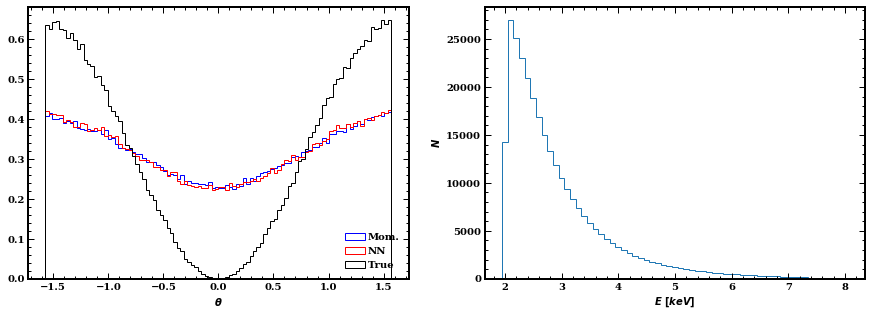

In [178]:
#Example (simulated) spectrum following spec.dat, with both moment analysis and NN predicted track angles
print("N total >> ", len(angles_mom_spec))

fig, (ax1,ax2) = plt.subplots(figsize=(15,5),ncols=2)
hist1 = ax1.hist(pi2_pi2(angles_mom_spec), bins=100, density=True,histtype="step",color="b",label="Mom.")
hist2 = ax1.hist(angles_NN_spec, bins=100, density=True,histtype="step",color="r",label="NN")
hist3 = ax1.hist(pi2_pi2(angles_sim_spec), bins=100, density=True,histtype="step",color="k",label="True")

ax1.legend(loc=4)
ax1.set_xlabel(r"$\theta$")

hist4 = ax2.hist(energies_spec,bins=np.linspace(1.95,8.05,62),histtype="step")
ax2.set_xlabel(r"$E$ $[keV]$")
ax2.set_ylabel(r"$N$")

In [191]:
# Standard Cut, keep = 0.8
cut = ellipticity_cut(angles_mom_spec, ellipticities_spec, 0.8)
angles_mom_spec_cut = angles_mom_spec[ellipticities_spec > cut]
mu, phi0, Neff = weighted_stokes(angles_mom_spec_cut, None, 1)

print("mu_eff >>", mu)
print("N_eff / N >>", Neff / 286181 )
print("MDP >>",MDP(Neff,mu)  / np.sqrt(76287/286181))

mu_eff >> 0.315328896817595
N_eff / N >> 0.7846887109905969
MDP >> 5.560573045852143


In [192]:
#Optimizing lambda for weighted moment analysis (using ellipticities as weights).
def mdp(lambd):
    mu, _, Neff = weighted_stokes(angles_mom_spec, ellipticities_spec, lambd)
    return MDP(Neff,mu)

res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
mu, _, Neff = weighted_stokes(angles_mom_spec, ellipticities_spec, res['x'])

print("mu_eff >>", mu)
print("N_eff / N >>", Neff / 286181 )
print("MDP >>", res['fun']  / np.sqrt(76287/286181) )
print(r"lambda >>", res['x'])

mu_eff >> 0.31244516721960786
N_eff / N >> 0.8829762026912062
MDP >> 5.290341567537704
lambda >> 0.669495799832251


In [ ]:
#Herman method for moments
def mdp(lambd):
    mu, _, Neff = weighted_stokes(angles_NN_spec, modf_weight, lambd)
    return MDP(Neff,mu)

res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
mu, _, Neff = weighted_stokes(angles_mom_spec, modf_weight, 1)
# mu, phi0, Neff = weighted_stokes(angles_mom_spec, modf_weight, 1)

print("mu_eff >>", mu)
print("N_eff / N >>", Neff / 286181 )
print("MDP >>",MDP(Neff,mu)  / np.sqrt(76287/286181))
print(r"lambda >>", res['x'])

In [193]:
#Lambda = 1.5 for weighted NNs
mu, phi0, Neff = weighted_stokes(angles_mom_spec, None, 1)

print("mu_eff >>", mu)
print("N_eff / N >>", Neff / 286181 )
print("MDP >>",MDP(Neff,mu)  / np.sqrt(76287/286181))

mu_eff >> 0.2691633844707371
N_eff / N >> 1.0
MDP >> 5.770534520708351


In [194]:
#Optimizing lambda for weighted NNs
def mdp(lambd):
    mu, _, Neff = weighted_stokes(angles_NN_spec, 1/errors_spec, lambd)
    return MDP(Neff,mu)

res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
mu, _, Neff = weighted_stokes(angles_NN_spec, 1/errors_spec, res['x'])

print("mu_eff >>", mu)
print("N_eff / N >>", Neff / 286181 )
print("MDP >>", res['fun']  / np.sqrt(76287/286181) )
print(r"lambda >>", res['x'])

mu_eff >> 0.36113283226827353
N_eff / N >> 0.8194340609691977
MDP >> 4.751251764851363
lambda >> 1.8612280540468826


In [158]:
# Optimizing the cut fraction
# Standard cut is keep = 0.8
def mdp(keep):
    cut = ellipticity_cut(angles_mom_spec, ellipticities_spec, keep)
    angles_mom_spec_cut = angles_mom_spec[ellipticities_spec > cut]
    mu, _, Neff = weighted_stokes(angles_mom_spec_cut, None, 1)
    return MDP(Neff,mu)

res = minimize_scalar(mdp, bounds=(0.02,1.01),method="bounded")
cut = ellipticity_cut(angles_mom_spec, ellipticities_spec, res['x'])
angles_mom_spec_cut = angles_mom_spec[ellipticities_spec > cut]
mu, _, Neff = weighted_stokes(angles_mom_spec_cut, None, 1)

print("mu_eff >>", mu)
print("N_eff / N >>", Neff / 286181 )
print("MDP >>", res['fun'] / np.sqrt(76287/286181) )
print(r"keep_fraction >>", res['x'])

mu_eff >> 0.33957706344765853
N_eff / N >> 0.6880330979345239
MDP >> 5.5142824844475165
keep_fraction >> 0.6960069608100495
